## 0. Packages and data

In [1]:
path='G:/Shared drives/BeStarsMiMeS/UpdatedFiles/' #Patrick's google file stream path

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as const
import specpolFlow as pol

In [3]:
from matplotlib.backends.backend_pdf import PdfPages


In [4]:
import pandas as pd
sheet_id = '1M6y1Wnsrc-w5FjUMfKaSFa_-foIDAaMe8W4lYNWnWyk'
sheet_name = 'Stars'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
StarData=pd.read_csv(url)

sheet_name = 'Observations'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
Observations=pd.read_csv(url)

In [5]:
import itertools


### This gets rid of the warnings in the cells where it is creating more than 20 figures (i.e. 1.2)
#### Not needed for this notebook but could be useful in the future
#import warnings
#warnings.filterwarnings("default", message="More than 20 figures have been opened.")
models=['hybrid_maskdepth0.02_tellClean',
 'hybrid_CleanAsif+tellClean',
 'hybrid_CleanAsifTweak+tellClean',
 'normalized_maskdepth0.02_tellClean',
 'normalized_CleanAsif+tellClean',
 'normalized_CleanAsifTweak+tellClean', 
 'hybrid_SuperCleanAsif+tellClean',
 'hybrid_SuperCleanAsifTweak+tellClean',
 'normalized_SuperCleanAsif+tellClean',
 'normalized_SuperCleanAsifTweak+tellClean']

In [6]:
sheet_id = '1M6y1Wnsrc-w5FjUMfKaSFa_-foIDAaMe8W4lYNWnWyk'
sheet_name = 'WellBehavedStars'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
WellBehaved=pd.read_csv(url)

model=pd.read_csv('{}04-Bz-calculations/{}_the38.csv'.format(path,models[0]))
WBvsig=[]
for j in range(WellBehaved['Name'].size):
    i=0
    while i in range(model['Star'].size):
        if model['Star'][i]==WellBehaved['Name'][j]:
            print(model['Star'][i])
            WBvsig.append(np.abs(model['V bz sig (G)']*3))
            break
        else:
            i+=1

hd10144
hd23302
hd23630
hd33328
hd138749
hd164284
hd170783
hd175869
hd189687
hd191610
hd224686


## 1. vsini Histogram

In [7]:
import pandas as pd
sheet_id = '1M6y1Wnsrc-w5FjUMfKaSFa_-foIDAaMe8W4lYNWnWyk'
sheet_name = 'Stars'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
StarData=pd.read_csv(url)

sheet_name = 'Observations'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
Observations=pd.read_csv(url)

In [8]:
#makes some histograms


Bevsini=StarData['Adopted-vsini']

binwidth=50
bins=np.arange(0, max(Bevsini) + binwidth, binwidth)


#plt.hist([Bevsini,np.abs(MBstar_vsini)],label=['{}'.format('Be stars'),'Magnetic Normal B stars'],bins=bins,alpha=0.9,color=['#f781bf','#4daf4a'],stacked=True)
#plt.hist(,label='Magnetic Normal B stars',bins=bins,color='#4daf4a',alpha=0.9)

plt.hist(np.abs(MBstar_vsini),label='Magnetic B stars',bins=bins,color='black',alpha=0.9,histtype='step',hatch='/')
plt.hist(Bevsini,label='{}'.format('Be stars'),bins=bins,alpha=0.9,color='salmon')
#plt.hist(v_sig,label='{}'.format(models[i]),bins=bins,alpha=0.9,color='#f781bf') 
"""plt.axvline(np.median(np.abs(MBstar_vsini)),color='darkgreen',linewidth=3,alpha=1,linestyle='dashed', label='Magnetic Normal B Star Median')
plt.axvline(np.mean(np.abs(MBstar_vsini)),color='darkgreen',linewidth=3,alpha=1,linestyle='solid', label='Magnetic Normal B Star Mean')
plt.axvline(np.median(np.abs(Bevsini)),color='#984ea3',linewidth=3,alpha=1,linestyle='dashed', label='Be Star Median')
plt.axvline(np.mean(np.abs(Bevsini)),color='#984ea3',linewidth=3,alpha=1,linestyle='solid', label='Be Star Mean')"""
plt.xlabel('vsini [km/s]',size=15)
plt.ylabel('Number of Stars',size=15)
#plt.ylim(0,40)
plt.xlim(0,520)
#plt.title('vsini [km/s]',size=15)
plt.legend()
plt.show()

NameError: name 'MBstar_vsini' is not defined

## 2. Magnetic B Star Upperlimits Comparison

### 2.1 Real Bz vs Bz Upperlimits

## 3. Paper Plots

### 3.1 Model Hists

hybrid_maskdepth0.02_tellClean 260.7718310265573
948.926302266302
hybrid_SuperCleanAsif+tellClean 349.80920984623344
1385.932834919872
normalized_SuperCleanAsif+tellClean 357.59777062662033
1356.7991167238695


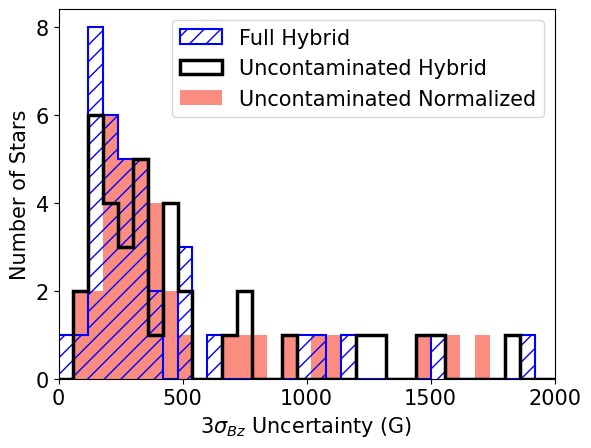

In [ ]:
#makes some histograms
models=['hybrid_maskdepth0.02_tellClean','hybrid_SuperCleanAsif+tellClean',
 'normalized_SuperCleanAsif+tellClean']
for i in range(len(models)):

  model=pd.read_csv('{}04-Bz-calculations/{}_the38.csv'.format(path,models[i]))
  v_sig=np.abs(model.groupby("Star").median()['V bz sig (G)'])*3.0

  binwidth=60
  bins=np.arange(0, max(v_sig) + binwidth, binwidth)
  
  if i==0:
    plt.hist(v_sig,label='Full Hybrid',bins=bins,alpha=1.0,histtype='step',color='blue',linewidth=1.5,hatch='//')

  if i==1: 
    plt.hist(v_sig,label='Uncontaminated Hybrid',bins=bins,alpha=1,histtype='step',color='black',linewidth=2.5)
  
  if i==2: 
    plt.hist(v_sig,label='Uncontaminated Normalized',bins=bins,alpha=0.9,histtype='bar',color='Salmon',linewidth=1)

  print(models[i],np.median(np.abs(v_sig)))
  print(np.mean(np.abs(v_sig)))

  plt.xlabel('$3\sigma_{Bz}$ Uncertainty (G)',size=15)
  plt.ylabel('Number of Stars',size=15)
  #plt.ylim(0,10)
  plt.xlim(0,2000)
  plt.legend()

#### 3.1.1 V and Null hist of Full Hybrid Model

43.467000455894635
198.2758389839014


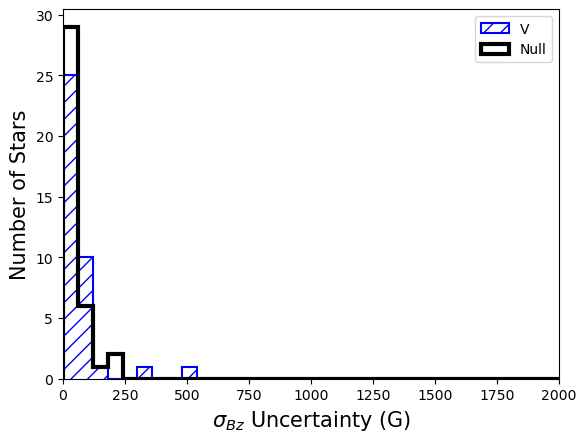

In [13]:
#makes some histograms
models=['hybrid_maskdepth0.02_tellClean','hybrid_SuperCleanAsif+tellClean',
 'normalized_SuperCleanAsif+tellClean']

model=pd.read_csv('{}04-Bz-calculations/{}_the38.csv'.format(path,models[0]))
v_sig=np.abs(model.groupby("Star").median()['V bz (G)'])

model=pd.read_csv('{}04-Bz-calculations/{}_the38.csv'.format(path,models[0]))
N_sig=np.abs(model.groupby("Star").median()['N1 bz (G)'])

binwidth=60
bins=np.arange(0, max(v_sig) + binwidth, binwidth)

plt.hist(v_sig,label='V',bins=bins,alpha=1.0,histtype='step',color='blue',linewidth=1.5,hatch='//')
plt.hist(N_sig,label='Null',bins=bins,alpha=1.0,histtype='step',color='black',linewidth=3)

print(np.median(np.abs(v_sig)))
print(np.mean(np.abs(v_sig)))

plt.xlabel('$\sigma_{Bz}$ Uncertainty (G)',size=15)
plt.ylabel('Number of Stars',size=15)
#plt.ylim(0,10)
plt.xlim(0,2000)
plt.legend()

Text(0, 0.5, 'Bz (G)')

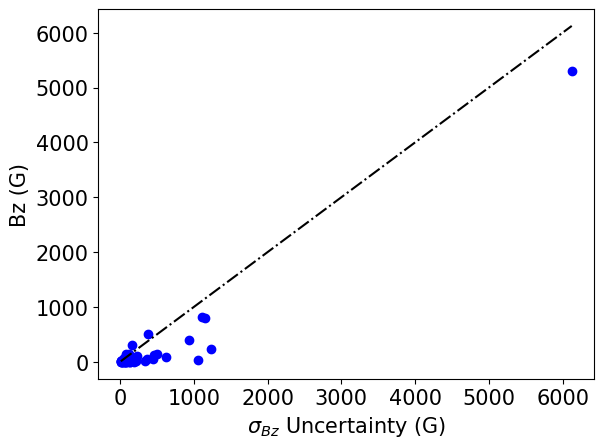

In [33]:
plt.rcParams.update({'font.size': 15})
model=pd.read_csv('{}04-Bz-calculations/{}.csv'.format(path,models[0]))
v=np.abs(model.groupby("Star").median()['V bz (G)'])
v_sig=np.abs(model.groupby("Star").median()['V bz sig (G)'])
plt.scatter(v_sig,v,color='b',label='Full Sample')
plt.plot([v_sig.min(),v_sig.max()],[v_sig.min(),v_sig.max()],label='One-to-One',linestyle='-.',color='k')
plt.xlabel('$\sigma_{Bz}$ Uncertainty (G)')
plt.ylabel('Bz (G)')

### 3.2 Model Validation

In [39]:
WBstars=['hd23302','hd23630','hd33328','hd138749','hd164284','hd170783','hd175869','hd189687','hd191610']
i=0
j=2
k=1

modelall1=pd.read_csv('{}04-Bz-calculations/{}_the38.csv'.format(path,models[i]))

modelall3=pd.read_csv('{}04-Bz-calculations/{}_the38.csv'.format(path,models[k]))

modelall2=pd.read_csv('{}04-Bz-calculations/{}_the38.csv'.format(path,models[j]))

WBvsig=[]
for m in range(modelall1.groupby("Star").median()['V bz sig (G)'].size):
    for n in range(len(WBstars)):
        if modelall1.groupby("Star",as_index=False).median()['Star'][m]==WBstars[n]:
            print(WBstars[n])
            WBvsig.append(modelall1.groupby("Star").median()['V bz sig (G)'][m])

WBvsig2=[]
for m in range(modelall1.groupby("Star").median()['V bz sig (G)'].size):
    for n in range(len(WBstars)):
        if modelall2.groupby("Star",as_index=False).median()['Star'][m]==WBstars[n]:
            WBvsig2.append(modelall2.groupby("Star").median()['V bz sig (G)'][m])

WBvsig3=[]
for m in range(modelall1.groupby("Star").median()['V bz sig (G)'].size):
    for n in range(len(WBstars)):
        if modelall3.groupby("Star",as_index=False).median()['Star'][m]==WBstars[n]:
            WBvsig3.append(modelall3.groupby("Star").median()['V bz sig (G)'][m])            



hd138749
hd164284
hd170783
hd175869
hd189687
hd191610
hd23302
hd23630
hd33328


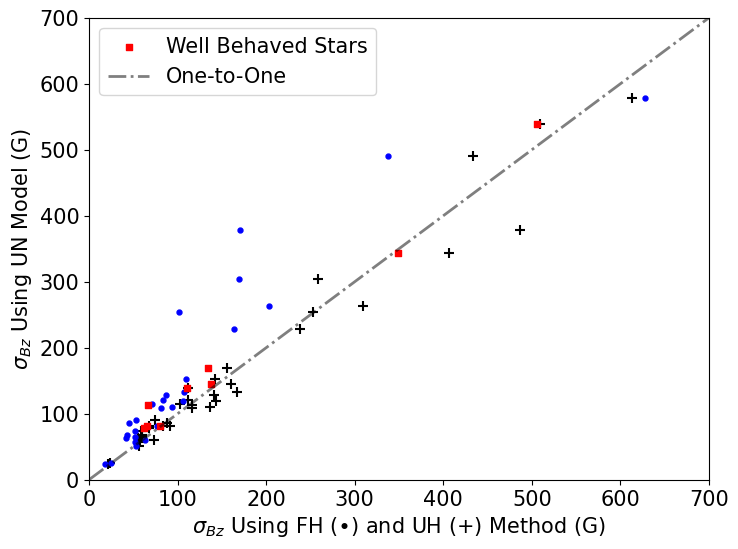

In [40]:
plt.rcParams['text.latex.preamble']=r"\usepackage{xcolor}"


i=0
j=2
k=1

modelall1=pd.read_csv('{}04-Bz-calculations/{}_the38.csv'.format(path,models[i]))
v_sigall1=3*np.abs(modelall1.groupby("Star").median()['V bz sig (G)'])

modelall3=pd.read_csv('{}04-Bz-calculations/{}_the38.csv'.format(path,models[k]))
v_sigall3=3*np.abs(modelall3.groupby("Star").median()['V bz sig (G)'])

modelall2=pd.read_csv('{}04-Bz-calculations/{}_the38.csv'.format(path,models[j]))
v_sigall2=3*np.abs(modelall2.groupby("Star").median()['V bz sig (G)'])


fig, ax = plt.subplots(1,1, figsize=(8,6))
plt.rcParams.update({'font.size': 15})
ax.scatter(v_sigall3/3, v_sigall2/3, color='black',marker='+',s=50)
ax.scatter(v_sigall1/3, v_sigall2/3,color='b',marker='.',s=50)

#ax.scatter(v_sig1,v_sig2, label='Well Behaved Stars')
ax.scatter(WBvsig, WBvsig2, label='Well Behaved Stars',color='r',marker='s',s=15)
ax.plot([0,1500],[0,1500],label='One-to-One',color='black',linestyle='-.',linewidth=2,alpha=0.5)
ax.legend()
ax.set_xlabel(r'$\sigma_{Bz}$ Using FH ($\bullet$) and UH ($+$) Method (G)')
ax.set_ylabel(r'$\sigma_{Bz}$ Using UN Model (G)')
#ax.set_title('3sig Bz'.format(models[i].split('_')[1]))
ax.set_xlim(0,700)
ax.set_ylim(0,700)
plt.show()

### 3.3 Magnetic B star comparison

In [42]:
import pandas as pd
sheet_id = '1Hle6DgGcse92VdarqZma1nje5xYwlJwnAkMStMba1xU'
sheet_name = 'Stars'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
StarData_B=pd.read_csv(url)

In [43]:

MBstarname=[]
for i in range(StarData_B['sigma'].size):
  if np.isnan(StarData_B['sigma'][i])==False:
    if StarData_B['Det Flag'][i]!='ND':
      MBstarname.append(StarData_B['HD Num'][i])

In [44]:
MBstar_bl=[]
for i in range(len(MBstarname)):
    MBstar_bl.append(StarData_B.groupby("HD Num").median()["Bl"][int(MBstarname[i])])

MBstar_sig=[]
for i in range(len(MBstarname)):
    MBstar_sig.append(StarData_B.groupby("HD Num").median()["sigma"][int(MBstarname[i])])

C:\Users\pjsta\AppData\Local\Temp\ipykernel_9872\1080721685.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  MBstar_bl.append(StarData_B.groupby("HD Num").median()["Bl"][int(MBstarname[i])])
C:\Users\pjsta\AppData\Local\Temp\ipykernel_9872\1080721685.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  MBstar_bl.append(StarData_B.groupby("HD Num").median()["Bl"][int(MBstarname[i])])
C:\Users\pjsta\AppData\Local\Temp\ipykernel_9872\1080721685.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either s

C:\Users\pjsta\AppData\Local\Temp\ipykernel_9872\3943591769.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.hist(np.abs(StarData_B.groupby("HD Num").median()["sigma"]),label='B Stars $\sigma_{Bz}$',bins=bins,color='salmon')
C:\Users\pjsta\AppData\Local\Temp\ipykernel_9872\3943591769.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.vlines(np.median(np.abs(StarData_B.groupby("HD Num").median()["sigma"])),0,20,color='Red',linewidth=2,linestyle='-.')


Text(0, 0.5, 'Number of Stars')

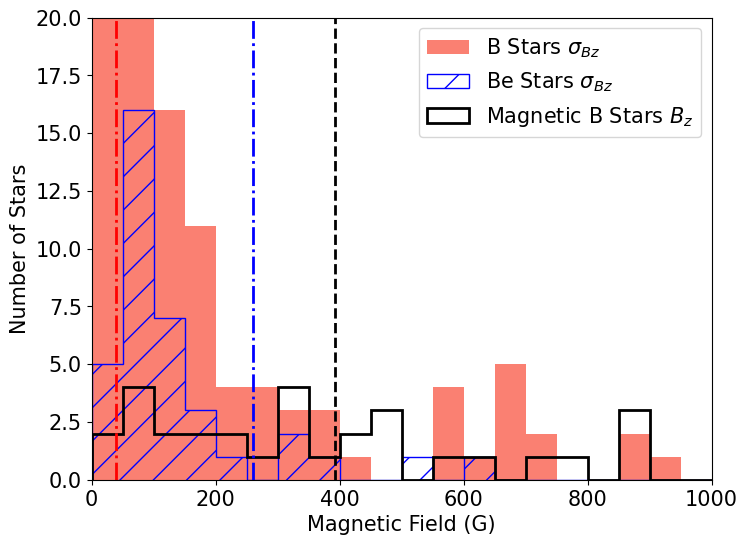

In [49]:
modelall1=pd.read_csv('{}04-Bz-calculations/{}_the38.csv'.format(path,models[0]))
v_sigall1=3*np.abs(modelall1.groupby("Star").median()['V bz sig (G)'])

binwidth=50
bins=np.arange(0, max(v_sigall1) + binwidth, binwidth)
fig, ax = plt.subplots(1,1, figsize=(8,6))
plt.hist(np.abs(StarData_B.groupby("HD Num").median()["sigma"]),label='B Stars $\sigma_{Bz}$',bins=bins,color='salmon')
plt.hist(v_sigall1/3,label='Be Stars $\sigma_{Bz}$',bins=bins,color='b',histtype='step',linewidth=1,hatch='/')
plt.hist(np.abs(MBstar_bl),label='Magnetic B Stars $B_z$',bins=bins,color='black',histtype='step',linewidth=2)


plt.vlines(np.median(np.abs(StarData_B.groupby("HD Num").median()["sigma"])),0,20,color='Red',linewidth=2,linestyle='-.')
#plt.vlines(np.median(v_sigall1/3),0,20,color='b',linewidth=2,linestyle='-.')
plt.vlines(np.median(v_sigall1),0,20,color='b',linewidth=2,linestyle='-.')
plt.vlines(np.median(np.abs(MBstar_bl)),0,20,color='black',linewidth=2,linestyle='--')


plt.xlim(0,1000)
plt.ylim(0,20)
plt.legend()
plt.xlabel('Magnetic Field (G)')
plt.ylabel('Number of Stars')

In [52]:
np.median(np.abs(StarData_B.groupby("HD Num").median()["sigma"]))*3

C:\Users\pjsta\AppData\Local\Temp\ipykernel_9872\3106521667.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  np.median(np.abs(StarData_B.groupby("HD Num").median()["sigma"]))*3


118.51259999999999

Text(0, 0.5, 'Number of Stars')

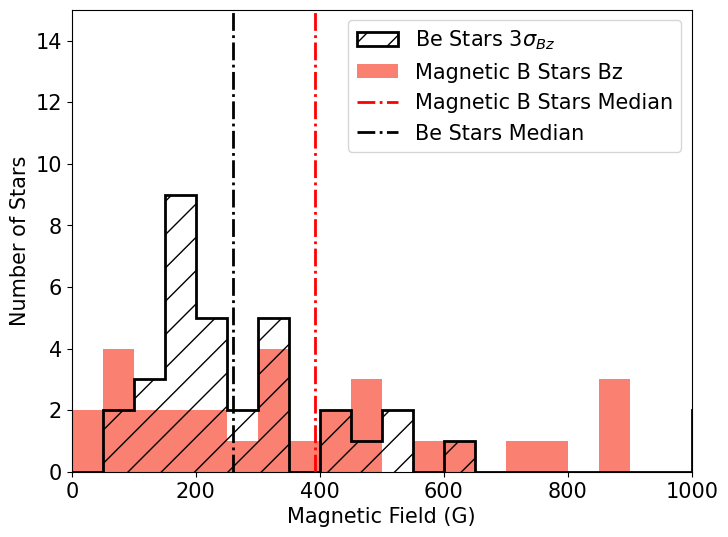

In [46]:
binwidth=50
bins=np.arange(0, max(v_sig) + binwidth, binwidth)
fig, ax = plt.subplots(1,1, figsize=(8,6))
plt.hist(v_sigall1,label='Be Stars $3\sigma_{Bz}$',bins=bins,color='black',histtype='step',hatch='/',linewidth=2)
plt.hist(np.abs(MBstar_bl),label='Magnetic B Stars Bz',bins=bins,color='salmon')

plt.vlines(np.median(np.abs(MBstar_bl)),0,20,label='Magnetic B Stars Median',color='red',linewidth=2,linestyle='-.')
plt.vlines(np.median(v_sigall1),0,20,label='Be Stars Median',color='black',linewidth=2,linestyle='-.')
plt.xlim(0,1000)
plt.ylim(0,15)
plt.legend()
plt.xlabel('Magnetic Field (G)')
plt.ylabel('Number of Stars')

### 3.4 Full Sample

hybrid_maskdepth0.02_tellClean 261.0957423506761
781.1920676529464
hybrid_SuperCleanAsif+tellClean 387.85522196255414
1121.2425331576999
normalized_SuperCleanAsif+tellClean 377.0159178152049
1238.599995553368


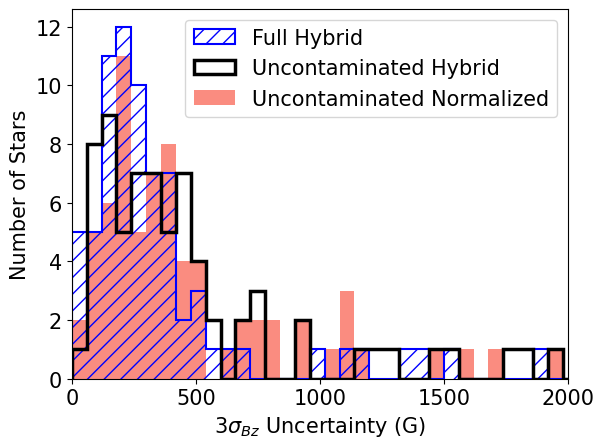

In [ ]:
#makes some histograms
models=['hybrid_maskdepth0.02_tellClean','hybrid_SuperCleanAsif+tellClean',
 'normalized_SuperCleanAsif+tellClean']
for i in range(len(models)):

  model=pd.read_csv('{}04-Bz-calculations/{}.csv'.format(path,models[i]))
  v_sig=np.abs(model.groupby("Star").median()['V bz sig (G)'])*3.0

  binwidth=60
  bins=np.arange(0, max(v_sig) + binwidth, binwidth)
  
  if i==0:
    plt.hist(v_sig,label='Full Hybrid',bins=bins,alpha=1.0,histtype='step',color='blue',linewidth=1.5,hatch='//')

  if i==1: 
    plt.hist(v_sig,label='Uncontaminated Hybrid',bins=bins,alpha=1,histtype='step',color='black',linewidth=2.5)
  
  if i==2: 
    plt.hist(v_sig,label='Uncontaminated Normalized',bins=bins,alpha=0.9,histtype='bar',color='Salmon',linewidth=1)

  print(models[i],np.median(np.abs(v_sig)))
  print(np.mean(np.abs(v_sig)))

  plt.xlabel('$3\sigma_{Bz}$ Uncertainty (G)',size=15)
  plt.ylabel('Number of Stars',size=15)
  #plt.ylim(0,10)
  plt.xlim(0,2000)
  plt.legend()

### 3.5 Well Behaved

In [ ]:
WBstars=['hd23302','hd23630','hd33328','hd138749','hd164284','hd170783','hd175869','hd189687','hd191610']
i=0
j=2
k=1

modelall1=pd.read_csv('{}04-Bz-calculations/{}_the38.csv'.format(path,models[i]))

modelall3=pd.read_csv('{}04-Bz-calculations/{}_the38.csv'.format(path,models[k]))

modelall2=pd.read_csv('{}04-Bz-calculations/{}_the38.csv'.format(path,models[j]))

WBvsig=[]
for m in range(modelall1.groupby("Star").median()['V bz sig (G)'].size):
    for n in range(len(WBstars)):
        if modelall1.groupby("Star",as_index=False).median()['Star'][m]==WBstars[n]:
            print(WBstars[n])
            WBvsig.append(modelall1.groupby("Star").median()['V bz sig (G)'][m])

WBvsig2=[]
for m in range(modelall1.groupby("Star").median()['V bz sig (G)'].size):
    for n in range(len(WBstars)):
        if modelall2.groupby("Star",as_index=False).median()['Star'][m]==WBstars[n]:
            WBvsig2.append(modelall2.groupby("Star").median()['V bz sig (G)'][m])

WBvsig3=[]
for m in range(modelall1.groupby("Star").median()['V bz sig (G)'].size):
    for n in range(len(WBstars)):
        if modelall3.groupby("Star",as_index=False).median()['Star'][m]==WBstars[n]:
            WBvsig3.append(modelall3.groupby("Star").median()['V bz sig (G)'][m])            



hd138749
hd164284
hd170783
hd175869
hd189687
hd191610
hd23302
hd23630
hd33328


292.13425379894613
811.7404554121155
398.19068226624563
1187.250173515547
397.31826050691814
1665.2138419008402


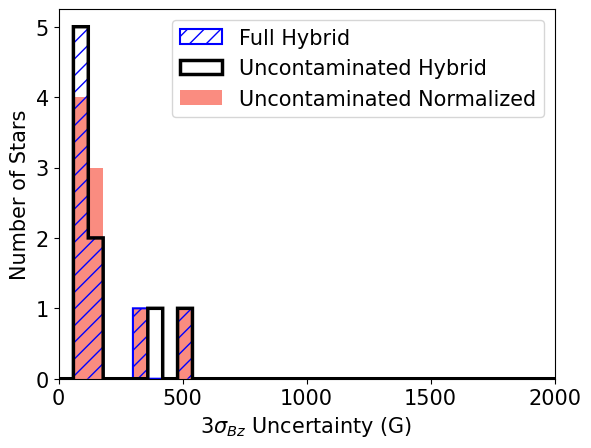

In [ ]:
#makes some histograms
models=['hybrid_maskdepth0.02_tellClean','hybrid_SuperCleanAsif+tellClean',
 'normalized_SuperCleanAsif+tellClean']
for i in range(len(models)):

  model=pd.read_csv('{}04-Bz-calculations/{}.csv'.format(path,models[i]))
  v_sig=np.abs(model['V bz sig (G)'])*3.0

  binwidth=60
  bins=np.arange(0, max(v_sig) + binwidth, binwidth)
  
  if i==0:
    plt.hist(WBvsig,label='Full Hybrid',bins=bins,alpha=1.0,histtype='step',color='blue',linewidth=1.5,hatch='//')

  if i==1: 
    plt.hist(WBvsig3,label='Uncontaminated Hybrid',bins=bins,alpha=1,histtype='step',color='black',linewidth=2.5)
  
  if i==2: 
    plt.hist(WBvsig2,label='Uncontaminated Normalized',bins=bins,alpha=0.9,histtype='bar',color='Salmon',linewidth=1)

  print(np.median(np.abs(v_sig)))
  print(np.mean(np.abs(v_sig)))

  plt.xlabel('$3\sigma_{Bz}$ Uncertainty (G)',size=15)
  plt.ylabel('Number of Stars',size=15)
  #plt.ylim(0,10)
  plt.xlim(0,2000)
  plt.legend()

In [ ]:
print(np.median(np.abs(WBvsig)))
print(np.median(np.abs(WBvsig3)))
print(np.median(np.abs(WBvsig2)))

110.75144058732518
116.2084007859682
139.46029706851397
